In [1]:
%%javascript
if($(IPython.toolbar.selector.concat(' > #kill-run-all')).length == 0){
  IPython.toolbar.add_buttons_group([
        {
             'label'   : 'kill and run-all',
             'icon'    : 'fa fa-angle-double-down',
             'callback': function(){
                 IPython.notebook.kernel.restart();
                 $(IPython.events).one('kernel_ready.Kernel',
                                       function(){IPython.notebook.execute_all_cells();});
             }
        }
    ], 'kill-run-all');
}

<IPython.core.display.Javascript object>

In [2]:
# import seaborn as sns
import matplotlib.pyplot as plt
from foof.util import create_psd
%matplotlib inline

In [3]:
# ING
%run ../bin/ei.py ../data/test/test_ing \
    -t 10 --stim 0.25 --rate 30 --period 0.5 \
    --I_e 0.1 --I_i 0.8 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 0.5 --w_ee 0.1 --w_ii 0.5 \
    --w_ei .3 --w_ie 1.2 --stdp

Trial 0
Starting simulation for duration 0.5 s
82.66 ms (16%) simulated in 10s, estimated 50s remaining.
165.07 ms (33%) simulated in 20s, estimated 41s remaining.
252.12 ms (50%) simulated in 30s, estimated 29s remaining.
0.3288 s (65%) simulated in 40s, estimated 21s remaining.
0.41728 s (83%) simulated in 50s, estimated 10s remaining.
0.5 s (100%) simulated in 59s
Saving results
Trial 1
Starting simulation for duration 0.5 s
41.835 ms (8%) simulated in 10s, estimated 1m 50s remaining.
83.65 ms (16%) simulated in 20s, estimated 1m 40s remaining.
128.075 ms (25%) simulated in 30s, estimated 1m 27s remaining.
167.09 ms (33%) simulated in 40s, estimated 1m 20s remaining.
211.68 ms (42%) simulated in 50s, estimated 1m 8s remaining.
0.5 s (100%) simulated in 58s
Saving results
Trial 2
Starting simulation for duration 0.5 s
27.70333333 ms (5%) simulated in 10s, estimated 2m 50s remaining.
55.38 ms (11%) simulated in 20s, estimated 2m 41s remaining.
84.82666667 ms (16%) simulated in 30s, es

WARNING  py.warnings: /home/ejp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)

  warnings.warn("Mean of empty slice", RuntimeWarning)



Saving results
Trial 3
Starting simulation for duration 0.5 s
20.9175 ms (4%) simulated in 10s, estimated 3m 49s remaining.
41.85 ms (8%) simulated in 20s, estimated 3m 39s remaining.
64.075 ms (12%) simulated in 30s, estimated 3m 24s remaining.
83.5975 ms (16%) simulated in 40s, estimated 3m 19s remaining.
105.87 ms (21%) simulated in 50s, estimated 3m 6s remaining.
0.5 s (100%) simulated in 58s
Saving results
Trial 4
Starting simulation for duration 0.5 s
16.616 ms (3%) simulated in 10s, estimated 4m 51s remaining.
33.284 ms (6%) simulated in 20s, estimated 4m 40s remaining.
51.002 ms (10%) simulated in 30s, estimated 4m 24s remaining.
66.542 ms (13%) simulated in 40s, estimated 4m 21s remaining.
84.258 ms (16%) simulated in 50s, estimated 4m 7s remaining.
0.5 s (100%) simulated in 58s
Saving results
Trial 5
Starting simulation for duration 0.5 s
13.95833333 ms (2%) simulated in 10s, estimated 5m 48s remaining.
27.94 ms (5%) simulated in 20s, estimated 5m 38s remaining.
42.79166667 m

WARNING  py.warnings: /home/ejp/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "

  warnings.warn("No labelled objects found. "



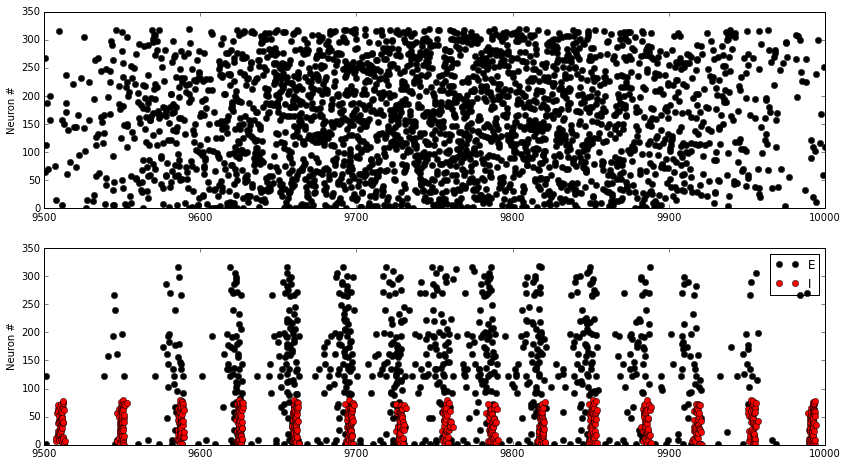

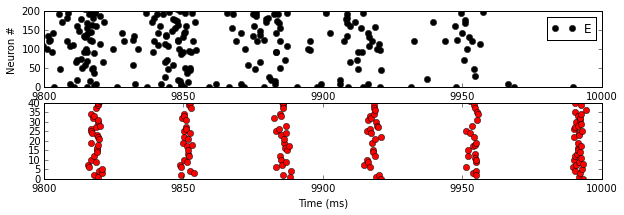

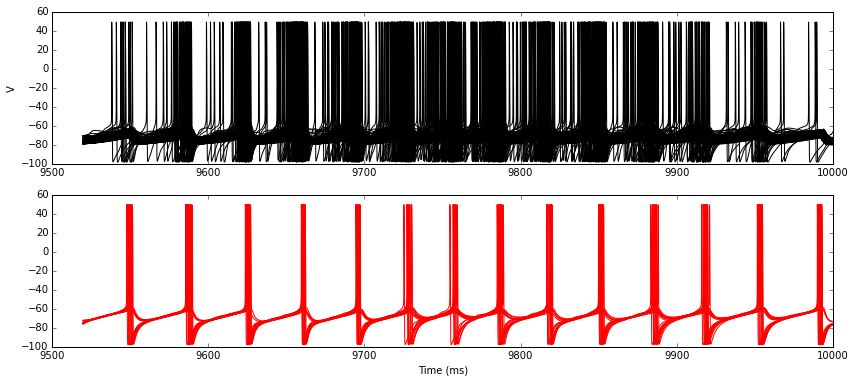

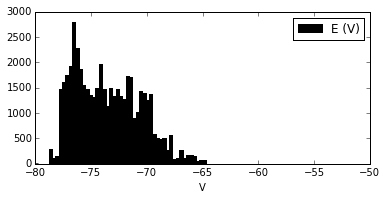

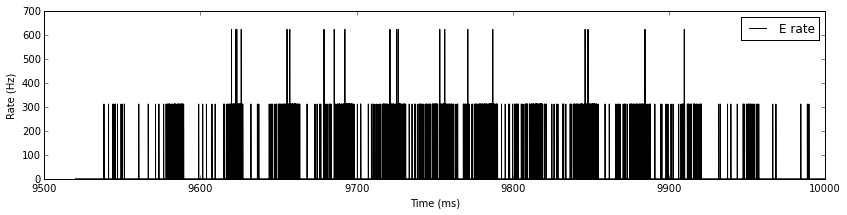

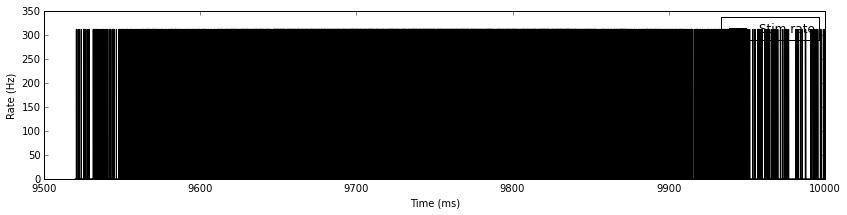

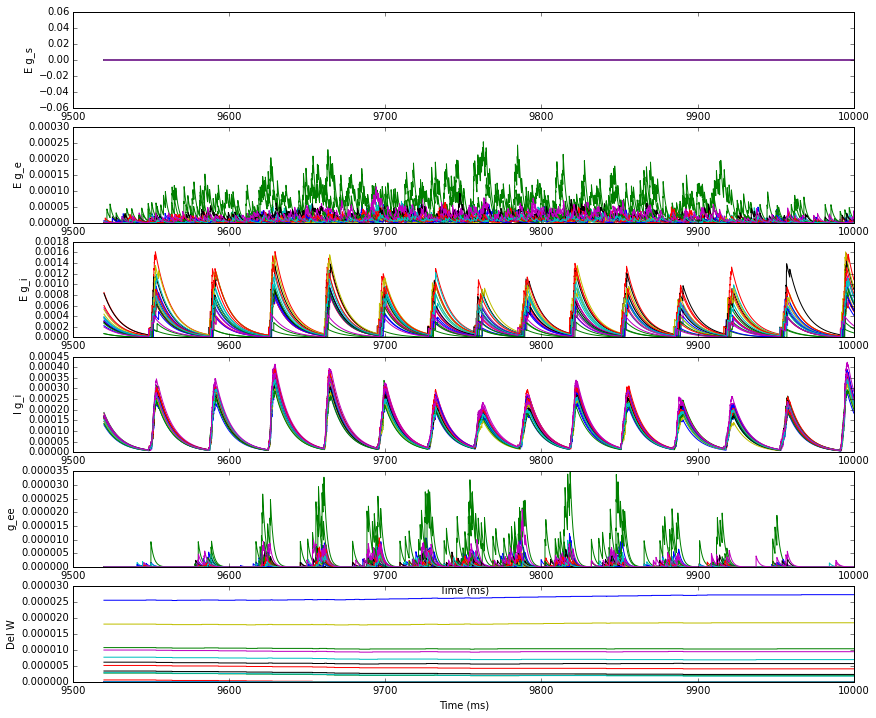

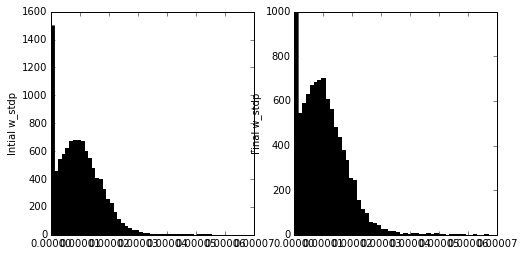

In [4]:
# To plot
trial = 19
period = 0.5
t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[:, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")

In [5]:
# Ping
# stim induced
%run ../bin/ei.py ../data/test/test_ing \
    -t 10 --stim 0.25 --rate 30 --period 0.5 \
    --I_e 0.1 --I_i 0.1 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 0.5 --w_ee 0.1 --w_ii 0.5 \
    --w_ei .3 --w_ie 1.2 --stdp

Trial 0
Starting simulation for duration 0.5 s
82.19 ms (16%) simulated in 10s, estimated 51s remaining.
164.47 ms (32%) simulated in 20s, estimated 41s remaining.
252.85 ms (50%) simulated in 30s, estimated 29s remaining.
0.33086 s (66%) simulated in 40s, estimated 20s remaining.
0.41918 s (83%) simulated in 50s, estimated 10s remaining.
0.5 s (100%) simulated in 59s
Saving results
Trial 1
Starting simulation for duration 0.5 s
41.145 ms (8%) simulated in 10s, estimated 1m 52s remaining.
82.05 ms (16%) simulated in 20s, estimated 1m 42s remaining.
125.52 ms (25%) simulated in 30s, estimated 1m 30s remaining.
163.875 ms (32%) simulated in 40s, estimated 1m 22s remaining.
207.52 ms (41%) simulated in 50s, estimated 1m 10s remaining.
0.5 s (100%) simulated in 59s
Saving results
Trial 2
Starting simulation for duration 0.5 s
27.32666667 ms (5%) simulated in 10s, estimated 2m 53s remaining.
54.65 ms (10%) simulated in 20s, estimated 2m 43s remaining.
83.55666667 ms (16%) simulated in 30s, 

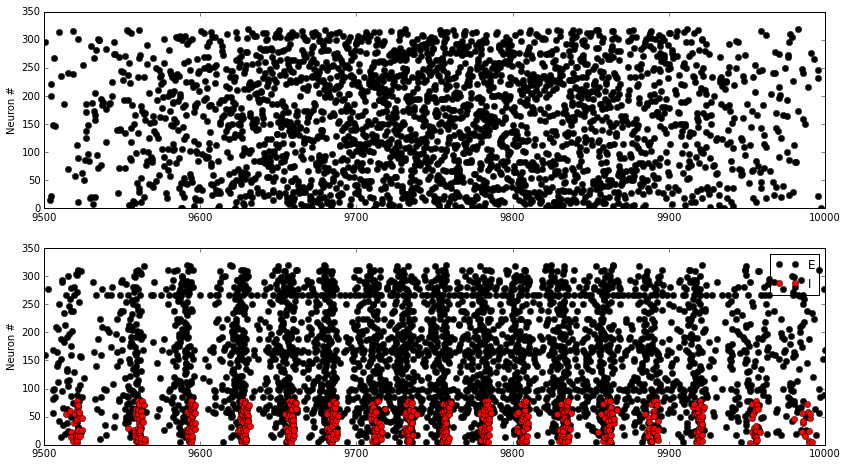

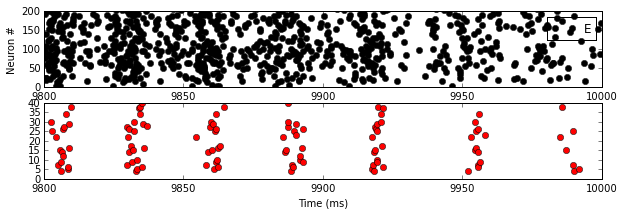

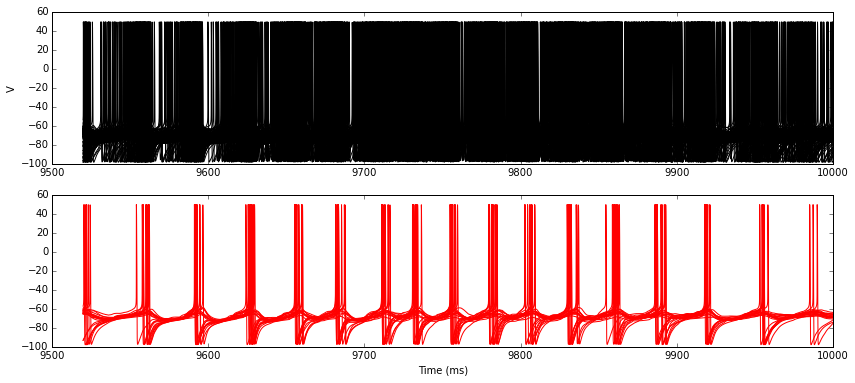

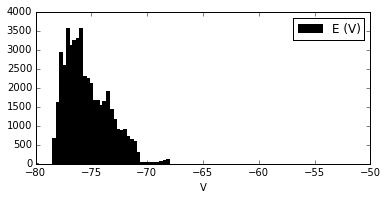

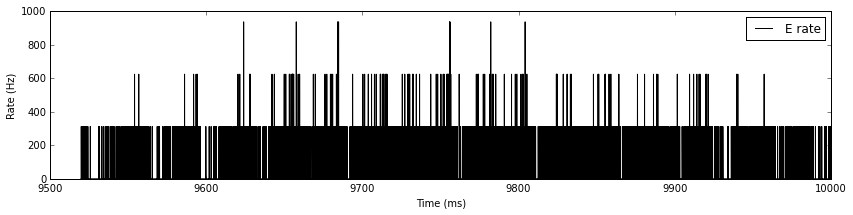

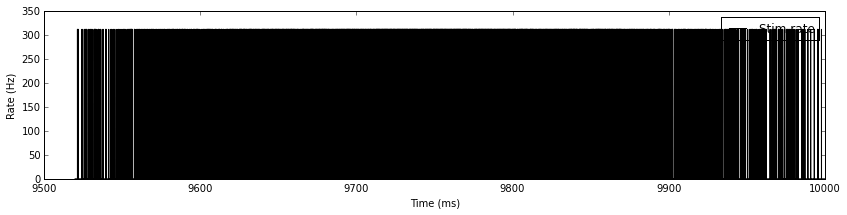

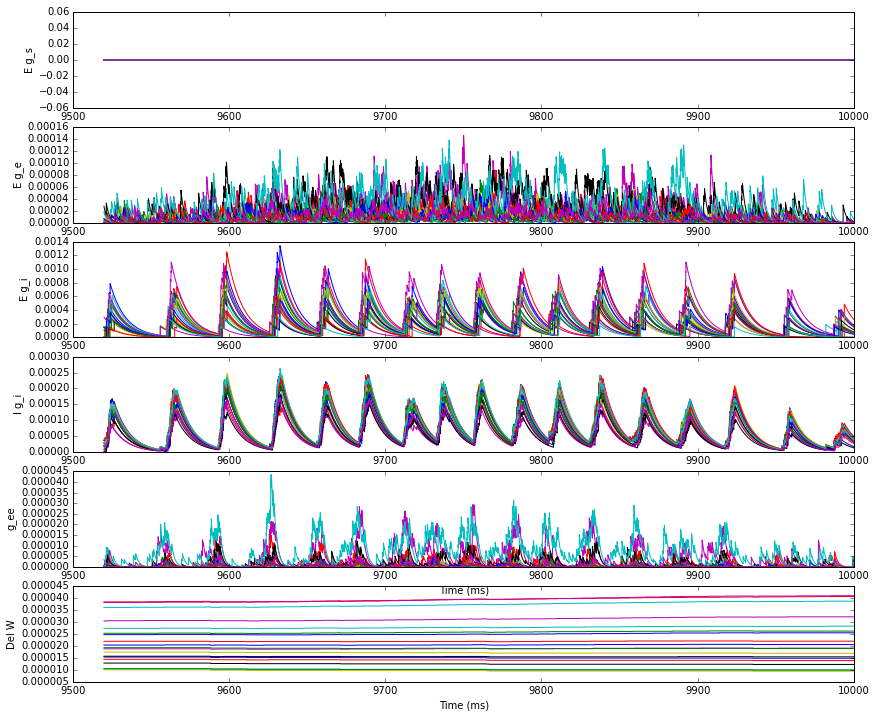

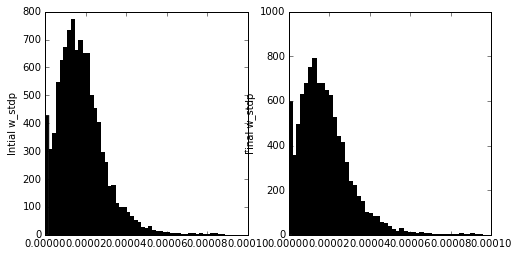

In [6]:
# To plot
trial = 19
period = 0.5
t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[:, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")